In [1]:
import darts
import numpy as np
from darts.models.forecasting.block_rnn_model import BlockRNNModel
from darts.dataprocessing.transformers import Scaler
import pandas as pd
from datetime import datetime
import tracestack
tracestack.off()
import optuna

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("C:\Windows\System32\####python program\EURUSD-2019_01_01-2019_02_01.csv", delimiter=",")

In [3]:
print(df)

                    time     open    close     high      low
0    2019-01-01 21:30:00  1.14682  1.14616  1.14691  1.14611
1    2019-01-01 21:30:00  1.14616  1.14526  1.14630  1.14505
2    2019-01-02 01:30:00  1.14526  1.14582  1.14584  1.14430
3    2019-01-02 05:30:00  1.14580  1.14376  1.14971  1.14290
4    2019-01-02 09:30:00  1.14376  1.13814  1.14423  1.13803
..                   ...      ...      ...      ...      ...
161  2019-02-01 05:30:00  1.14411  1.14609  1.14640  1.14346
162  2019-02-01 09:30:00  1.14607  1.14747  1.14750  1.14575
163  2019-02-01 13:30:00  1.14749  1.14714  1.14887  1.14477
164  2019-02-01 17:30:00  1.14713  1.14607  1.14733  1.14558
165  2019-02-01 21:30:00  1.14602  1.14578  1.14606  1.14534

[166 rows x 5 columns]


In [4]:
del df['open'], df['high'], df['low']

In [5]:
print(df)

                    time    close
0    2019-01-01 21:30:00  1.14616
1    2019-01-01 21:30:00  1.14526
2    2019-01-02 01:30:00  1.14582
3    2019-01-02 05:30:00  1.14376
4    2019-01-02 09:30:00  1.13814
..                   ...      ...
161  2019-02-01 05:30:00  1.14609
162  2019-02-01 09:30:00  1.14747
163  2019-02-01 13:30:00  1.14714
164  2019-02-01 17:30:00  1.14607
165  2019-02-01 21:30:00  1.14578

[166 rows x 2 columns]


<AxesSubplot:>

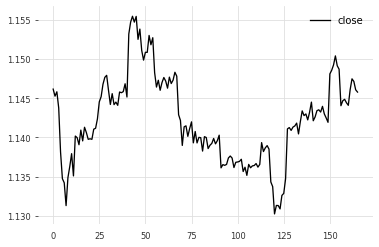

In [6]:
df.plot()

In [7]:
df.drop_duplicates(subset="time",keep ="first", inplace =True)
print(df)

                    time    close
0    2019-01-01 21:30:00  1.14616
2    2019-01-02 01:30:00  1.14582
3    2019-01-02 05:30:00  1.14376
4    2019-01-02 09:30:00  1.13814
5    2019-01-02 13:30:00  1.13473
..                   ...      ...
161  2019-02-01 05:30:00  1.14609
162  2019-02-01 09:30:00  1.14747
163  2019-02-01 13:30:00  1.14714
164  2019-02-01 17:30:00  1.14607
165  2019-02-01 21:30:00  1.14578

[143 rows x 2 columns]


<AxesSubplot:>

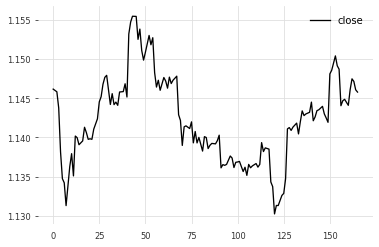

In [8]:
df.plot()

In [9]:
del df['time']

In [10]:
df.reset_index(level=0, inplace=True)
print(df[:10])

   index    close
0      0  1.14616
1      2  1.14582
2      3  1.14376
3      4  1.13814
4      5  1.13473
5      6  1.13420
6      7  1.13129
7      9  1.13628
8     10  1.13792
9     11  1.13508


In [11]:
print(len(df))

143


In [12]:
series = darts.timeseries.TimeSeries.from_dataframe(df,time_col ='index')

In [13]:
print(series[:10])

<TimeSeries (DataArray) (index: 10, component: 1, sample: 1)>
array([[[1.14616]],

       [[1.14582]],

       [[1.14376]],

       [[1.13814]],

       [[1.13473]],

       [[1.1342 ]],

       [[1.13129]],

       [[1.13628]],

       [[1.13792]],

       [[1.13508]]])
Coordinates:
  * index      (index) int64 0 2 3 4 5 6 7 9 10 11
  * component  (component) object 'close'
Dimensions without coordinates: sample


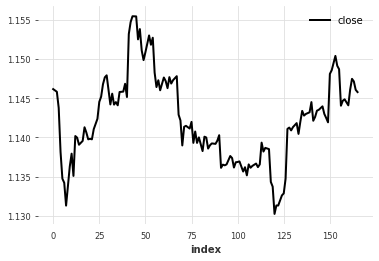

In [14]:
series.plot()

In [15]:
test, series1 = series[133:], series[:133] 
print(len(test), len(series1))

10 133


In [16]:
train,val = series1[:100], series1[100:]
print(len(train), len(val), len(test))

100 33 10


In [17]:
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
test_transformed = transformer.transform(test)
series1_transformed = transformer.transform(series1)

In [18]:
print(train_transformed)

<TimeSeries (DataArray) (index: 100, component: 1, sample: 1)>
array([[[0.61522549]],

       [[0.60115846]],

       [[0.51592884]],

       [[0.28340918]],

       [[0.1423252 ]],

       [[0.12039719]],

       [[0.        ]],

       [[0.20645428]],

       [[0.27430699]],

       [[0.15680596]],

...

       [[0.15970211]],

       [[0.21762516]],

       [[0.19983451]],

       [[0.20976417]],

       [[0.22217625]],

       [[0.20314439]],

       [[0.21762516]],

       [[0.33264377]],

       [[0.28547787]],

       [[0.30492346]]])
Coordinates:
  * index      (index) int64 0 2 3 4 5 6 7 9 ... 107 108 110 111 112 113 114 115
  * component  (component) object 'close'
Dimensions without coordinates: sample


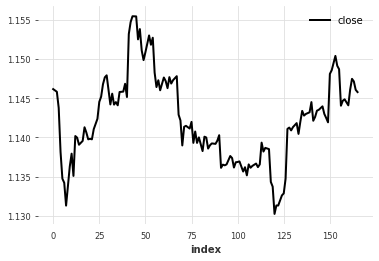

In [19]:
series.plot()

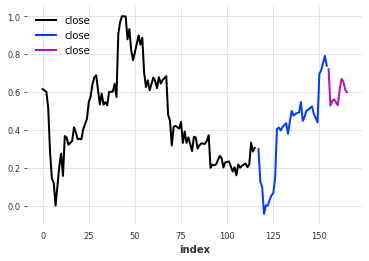

In [20]:
train_transformed.plot()
val_transformed.plot()
test_transformed.plot()

In [21]:
from darts.utils.likelihood_models import BernoulliLikelihood
from darts.utils.likelihood_models import CauchyLikelihood
from darts.utils.likelihood_models import ContinuousBernoulliLikelihood
from darts.utils.likelihood_models import DirichletLikelihood

In [ ]:
model = BlockRNNModel(input_chunk_length =10, 
                      output_chunk_length= 5, 
                      model= "GRU", 
                      dropout= 0.5674480512117217, 
                      hidden_size= 141,
                      n_rnn_layers= 9,
                      random_state= 18,
                      n_epochs =50,
                      work_dir ='C:\Windows\System32\####python program\model checkpoint\Blockrnn',
                      log_tensorboard =True,
                      force_reset =False,
                      save_checkpoints =True
                     )


In [ ]:
# Training the model on the complete training set
model.fit(train_transformed)

In [ ]:
# Evaluating the model on the validation set
pred = model.predict(n=33)

In [ ]:
train_transformed.plot()
val_transformed.plot()
pred.plot()